In [1]:
import glob, os
import numpy as np
import pandas as pd
import pickle

import util

%load_ext autoreload
%autoreload 2

In [36]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import imageio


In [2]:
skeletons_dir = "./data_raw/"

In [3]:
skeleton_files = glob.glob(skeletons_dir+'*.skeleton')

In [4]:
len(skeleton_files)

948

In [5]:
bodyinfo = util.read_skeleton_file(skeleton_files[0])

In [6]:
bodyinfo[3][0]['joints'][24]

{'colorX': 943.086,
 'colorY': 448.7361,
 'depthX': 244.5866,
 'depthY': 167.4994,
 'orientationW': 0.0,
 'orientationX': 0.0,
 'orientationY': 0.0,
 'orientationZ': 0.0,
 'trackingState': 2,
 'x': -0.110189,
 'y': 0.3840762,
 'z': 3.428584}

In [7]:
scaled_joints = util.normalize_joints(bodyinfo[3][0]['joints'])
scaled_joints

[array([ 1.00822668, -0.12268341, -0.05895042]),
 array([ 0.50154701, -0.06661115, -0.04086145]),
 array([ 0.,  0.,  0.]),
 array([-0.26215165, -0.06558784,  0.01864999]),
 array([ 0.1871934 , -0.32368262, -0.03786402]),
 array([ 0.50603828, -0.13597163,  0.35695451]),
 array([ 0.17311784, -0.18295301,  0.19197855]),
 array([ 0.10901884, -0.16417754,  0.08177304]),
 array([ 0.22210351,  0.24148118,  0.04575928]),
 array([ 0.60334717,  0.39203051,  0.01434203]),
 array([ 0.59993434,  0.01496036,  0.33106   ]),
 array([ 0.55565651, -0.09849649,  0.39694532]),
 array([ 0.99268826, -0.18895597,  0.        ]),
 array([ 1.73714571, -0.20531212, -0.08254957]),
 array([ 2.42953671, -0.1875422 , -0.27160425]),
 array([ 2.55507929, -0.08148215, -0.19863017]),
 array([  1.00000000e+00,   1.46006197e-17,   2.92012394e-17]),
 array([ 1.74047861,  0.07299152, -0.04459515]),
 array([  2.48056133e+00,  -6.60286326e-04,  -2.19572354e-01]),
 array([ 2.54503533, -0.00499526,  0.01162587]),
 array([ 0.125

In [11]:
for sfile in skeleton_files:
    util.process_skeleton(sfile, skeletons_dir)

In [12]:
pickle_files = glob.glob(skeletons_dir+'*.pickle')

In [13]:
with open(pickle_files[0], 'rb') as fp:
    bodyinfo = pickle.load(fp)

bodyinfo.shape

(69, 1, 25, 3)

In [24]:
# Vertices to keep:
idxKeep = [3,4,5,6,7,8,9,10,11,21,22,23,24]

In [27]:
h1 = util.pickle_to_action_array(pickle_files[0], idxKeep)

In [31]:
h1[0][1].shape

(68, 13, 3)

In [32]:
# Velocity
h1[0][1][0:20]

array([[[  1.79362565e-04,   1.42531674e-04,  -2.44409773e-04],
        [  6.80003501e-04,  -5.59703211e-05,  -3.21564083e-04],
        [  3.98496407e-04,   2.38394482e-05,  -1.58906579e-04],
        [  3.32137652e-04,  -1.10687330e-04,   1.80418644e-04],
        [  5.13737112e-03,   7.05342212e-03,   1.64397937e-02],
        [ -3.62614108e-04,  -3.14550446e-04,  -1.16938536e-03],
        [ -4.50721851e-04,   3.61694980e-03,  -4.36616025e-03],
        [ -1.01897469e-02,  -1.21912363e-02,   1.34440189e-02],
        [ -5.94241305e-03,  -9.68823355e-04,   1.80370473e-02],
        [ -6.59512042e-04,  -2.92318973e-02,  -3.00897395e-02],
        [  4.22642448e-02,   6.26897716e-03,   2.11341161e-02],
        [ -2.80216293e-02,  -1.40552139e-02,  -8.70406050e-03],
        [ -2.01497227e-02,  -7.05386412e-03,  -1.72983852e-02]],

       [[  5.18347596e-04,  -8.41190583e-04,  -5.10167490e-04],
        [  2.78236406e-03,  -4.36794629e-03,  -1.45669328e-03],
        [ -6.08875580e-02,   2.9039770

In [35]:
# Accelaration
h1[0][2][:,4,:]

array([[ -3.71586576e-02,  -9.69533936e-03,  -2.63092783e-02],
       [  4.45020041e-02,   7.60228714e-03,   1.44893975e-02],
       [ -3.20818756e-02,   1.84603733e-02,   2.23171587e-03],
       [  3.91813235e-02,  -2.51424933e-02,  -2.17954170e-02],
       [ -3.60400476e-02,   2.01415694e-02,   3.11657305e-02],
       [  7.83671219e-03,  -6.13304345e-03,  -5.67647867e-03],
       [  2.62601741e-02,   1.42717579e-02,  -1.79166093e-02],
       [ -6.44878640e-02,  -5.06225131e-02,   4.00264644e-02],
       [  3.30677406e-02,   3.94007303e-02,  -1.88755107e-02],
       [  3.13859846e-02,  -2.37825566e-02,  -3.02722709e-02],
       [ -1.35515268e-02,  -3.68990402e-03,   1.84862706e-02],
       [  1.98157700e-02,   4.72084437e-03,  -2.32656551e-02],
       [ -3.04003870e-02,   2.25580675e-02,   2.54581862e-02],
       [  2.21728752e-02,  -1.42805469e-02,   7.09290849e-04],
       [ -4.69738234e-02,   1.70646296e-02,   3.07836387e-02],
       [  3.92617948e-01,  -2.07857626e-01,   2.8401367

(array([  1.,   0.,   0.,   2.,  29.,  30.,   4.,   0.,   0.,   1.]),
 array([ -3.92413057e-01,  -3.13909957e-01,  -2.35406856e-01,
         -1.56903756e-01,  -7.84006552e-02,   1.02445223e-04,
          7.86055457e-02,   1.57108646e-01,   2.35611747e-01,
          3.14114847e-01,   3.92617948e-01]),
 <a list of 10 Patch objects>)

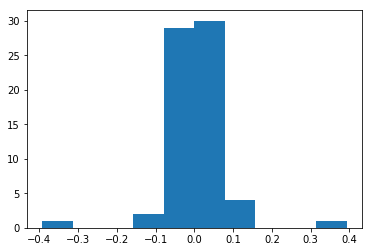

In [37]:
# x-axis
plt.hist(h1[0][2][:,4,0])

(array([  2.,   1.,   1.,   6.,   4.,  38.,  10.,   2.,   2.,   1.]),
 array([-0.45674425, -0.37199903, -0.28725382, -0.2025086 , -0.11776339,
        -0.03301818,  0.05172704,  0.13647225,  0.22121746,  0.30596268,
         0.39070789]),
 <a list of 10 Patch objects>)

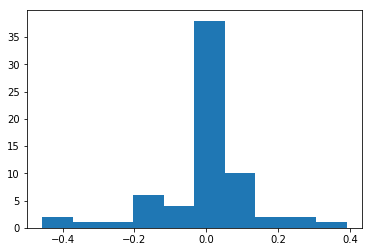

In [43]:
# y-axis -hand
plt.hist(h1[0][2][:,4,1])

(array([  3.,   2.,   2.,   9.,  13.,   9.,  14.,   9.,   2.,   4.]),
 array([-0.00656225, -0.00535561, -0.00414897, -0.00294232, -0.00173568,
        -0.00052903,  0.00067761,  0.00188425,  0.0030909 ,  0.00429754,
         0.00550418]),
 <a list of 10 Patch objects>)

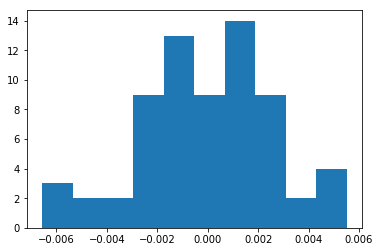

In [40]:
# y-axis -head
plt.hist(h1[0][2][:,0,1])

(array([  1.,   0.,   0.,   0.,   7.,  47.,  10.,   1.,   0.,   1.]),
 array([-0.36694665, -0.30185061, -0.23675458, -0.17165855, -0.10656252,
        -0.04146649,  0.02362954,  0.08872558,  0.15382161,  0.21891764,
         0.28401367]),
 <a list of 10 Patch objects>)

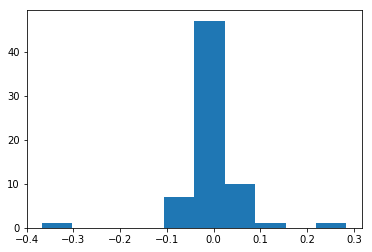

In [39]:
# z-axis
plt.hist(h1[0][2][:,4,2])

In [340]:
a_all = np.asarray([x[0][2] for x in data]).flatten()

(array([  3.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   2.00000000e+00,
          7.00000000e+00,   3.00000000e+00,   0.00000000e+00,
          3.00000000e+00,   7.00000000e+00,   5.00000000e+01,
          2.26000000e+02,   2.57000000e+03,   4.52800000e+03,
          1.17900000e+04,   8.13300000e+03,   4.16800000e+03,
          3.13000000e+03,   3.01500000e+03,   2.33000000e+02,
          2.30000000e+01,   4.00000000e+00,   3.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

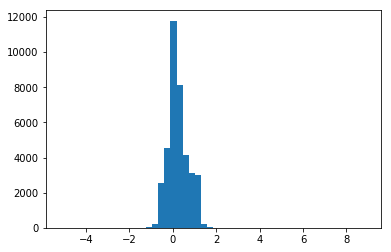

In [371]:
#a values:
plt.hist(a_all, bins =50)

In [117]:
data = util.pickle_files_to_action_series(pickle_files, idxKeep)

./data_raw/S002C003P010R002A010.pickle
./data_raw/S003C003P002R002A010.pickle
./data_raw/S004C002P008R001A010.pickle
./data_raw/S005C002P016R001A010.pickle
./data_raw/S006C003P007R002A010.pickle
./data_raw/S007C002P026R001A010.pickle
./data_raw/S007C003P027R002A010.pickle
./data_raw/S008C002P001R001A010.pickle
./data_raw/S011C002P027R001A010.pickle


In [47]:
with open('./data_raw/S004C002P008R001A010.pickle', 'rb') as fp:
    bodyinfo_check = pickle.load(fp)

bodyinfo_check.shape
# Those seem to be broken files

(78,)

In [48]:
len(data)

972

In [66]:
data[0][0].shape

(69, 13, 3)

## Visualize normalized state

In [85]:
state = data[0][0]
frame = 1
xs_1 = state[frame,[0,1,2,3,4,9,10] ,0]
xs_2 = state[frame,[0,5,6,7,8,11,12],0]
ys_1 = state[frame,[0,1,2,3,4,9,10],1] 
ys_2 = state[frame,[0,5,6,7,8,11,12],1]
zs_1 = state[frame,[0,1,2,3,4,9,10],2] 
zs_2 = state[frame,[0,5,6,7,8,11,12],2]

In [83]:
x_max, x_min = np.max(state[:,:,0]), np.min(state[:,:,0])
y_max, y_min = np.max(state[:,:,1]), np.min(state[:,:,1])
z_max, z_min = np.max(state[:,:,2]), np.min(state[:,:,2])

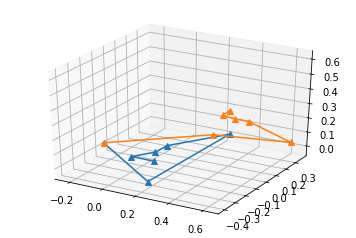

In [86]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim3d(x_min-1e-3, x_max+1e-3)
ax.set_ylim3d(y_min-1e-3, y_max+1e-3)
ax.set_zlim3d(z_min-1e-3, z_max+1e-3)
ax.plot(xs_1, ys_1, zs_1, marker = '^')
ax.plot(xs_2, ys_2, zs_2, marker = '^')
fig.savefig('test.png')

In [227]:
def getImage(data, key, state =None):
    if state is None:
        state = data[key][0]
    x_max, x_min = np.max(state[:,:,0]), np.min(state[:,:,0])
    y_max, y_min = np.max(state[:,:,1]), np.min(state[:,:,1])
    z_max, z_min = np.max(state[:,:,2]), np.min(state[:,:,2])
    path = './plot_' + str(key)
    images = []
    if not os.path.isdir(path):
        os.mkdir(path)
    for frame in range(len(state)):
        xs_1 = state[frame,[0,1,2,3,4,9,10] ,0]
        xs_2 = state[frame,[0,5,6,7,8,11,12],0]
        ys_1 = state[frame,[0,1,2,3,4,9,10],1] 
        ys_2 = state[frame,[0,5,6,7,8,11,12],1]
        zs_1 = state[frame,[0,1,2,3,4,9,10],2] 
        zs_2 = state[frame,[0,5,6,7,8,11,12],2]

        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.set_xlim3d(x_min-1e-3, x_max+1e-3)
        ax.set_ylim3d(y_min-1e-3, y_max+1e-3)
        ax.set_zlim3d(z_min-1e-3, z_max+1e-3)
        ax.plot(xs_1, ys_1, zs_1, marker = '^')
        ax.plot(xs_2, ys_2, zs_2, marker = '^')
        fig.savefig(path + '/plot_' + str(frame) + '.png')
        plt.close(fig)
        images.append(imageio.imread(path + '/plot_' + str(frame) + '.png'))
    imageio.mimsave(path + '/movie.gif', images)

In [106]:
getImage(data, 0)

In [109]:
len(data[100][0])

58

In [121]:
getImage(data, 971)

In [118]:
data[100][-1]

'./data_raw/S002C003P012R001A010.pickle'

In [180]:
pickle.dump(data, open('data.p', 'wb'))

## Build model

In [207]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import pickle
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch import optim
import random

In [251]:
gamma = 0.95
def getReward(seq, gamma):
    len_seq = len(seq)+1
    idx = np.arange(len_seq)
    reward = gamma**(len_seq - idx-1)
    reward = np.diff(reward)
    return reward

In [252]:
a = [1,2,3,4,5]
getReward(a, gamma)

array([ 0.04072531,  0.04286875,  0.045125  ,  0.0475    ,  0.05      ])

In [125]:
import pdb

In [343]:
class skDataset(Dataset):
    def __init__(self, data, gamma, length):
        self.data = data
        self.gamma = gamma
        self.length = length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, key):
        item = self.data[key]
        v_seq = item[0][1:-1]
        d_seq = item[1][0:-1]
        a_seq = item[2]
        reward = getReward(a_seq, self.gamma)
        
        pad_len = max(0, self.length - len(v_seq))
        v_seq_pad = np.pad(v_seq, pad_width = ((0, pad_len),(0,0), (0,0)), mode = 'constant', constant_values=0)
        d_seq_pad = np.pad(d_seq, pad_width = ((0, pad_len),(0,0), (0,0)), mode = 'constant', constant_values=0)
        a_seq_pad = np.pad(d_seq, pad_width = ((0, pad_len),(0,0), (0,0)), mode = 'constant', constant_values=0)
        a_seq_pad = np.clip(a_seq_pad, -2,2)
        reward_pad = np.pad(reward, pad_width = (0, pad_len), mode = 'constant', constant_values=0)
        
        sample = {'v_seq': torch.from_numpy(v_seq_pad).float(),
                  'd_seq': torch.from_numpy(d_seq_pad).float(),
                  'a_seq': torch.from_numpy(a_seq_pad).float(),
                  'reward': torch.from_numpy(reward_pad).float()}
        return sample


In [138]:
lsLen = [len(x[0]) for x in data]
print(np.percentile(lsLen, 90))
print(np.percentile(lsLen, 95))
print(np.max(lsLen))

87.0
93.0
140


In [344]:
train = skDataset(data[:-10], gamma, 140)
test = skDataset(data[-10:], gamma, 140)

In [345]:
class gru(nn.Module):
    def __init__(self, dimIn, dimLSTM, nLSTM, p_dropOut, lsDim, flg_bn):
        super(gru, self).__init__()
        self.dimLSTM = dimLSTM
        self.nLSTM = nLSTM
        self.p_dropOut = p_dropOut
        self.flg_bn = flg_bn
        self.lsDim = lsDim
        
        self.lstm = nn.GRU(dimIn, dimLSTM, self.nLSTM, batch_first=True, bidirectional=False, dropout=self.p_dropOut)
        self.bns = nn.ModuleList([nn.BatchNorm1d(self.lsDim[i + 1]) for i in range(len(self.lsDim) - 2)])
        self.FCs = nn.ModuleList([nn.Linear(self.lsDim[i], self.lsDim[i + 1]) for i in range(len(self.lsDim) - 1)])

    def fc_layer(self, x, layer, bn=None):
        x = layer(x)
        if self.flg_bn:
            x = F.relu(bn(x))
        else:
            x = F.relu(x)
        x = F.dropout(x, self.p_dropOut)
        return x

    def init_hidden(self, batchSize, nLSTM):
        return Variable(torch.zeros(nLSTM, batchSize, self.dimLSTM))

    def forward(self, v_seq, d_seq):
        batchSize, seq_len = v_seq.shape[0], v_seq.shape[1]
        in_seq = torch.cat((v_seq, d_seq), 2).view(batchSize, seq_len, -1)
        h0 = self.init_hidden(batchSize=batchSize, nLSTM= self.nLSTM)
        lstm_out, hidden = self.lstm(in_seq, h0)

        z = lstm_out
        if len(self.lsDim) > 2:
            for i in range(len(self.lsDim) - 2):
                z = self.fc_layer(z, self.FCs[i], self.bns[i])

        self.y_hat = 2*F.tanh(self.FCs[-1](z))
        return self.y_hat

    def prediction(self, v_1, d_0, max_len):
        batchSize = v_1.shape[0]
        v_seq = torch.zeros(batchSize, max_len+1, 13, 3)
        v_seq[:,0,:,:] = v_1
        d_seq = torch.zeros(batchSize, max_len+1, 13, 3)
        d_seq[:,0,:,:] = d_0
        a_seq = torch.zeros(batchSize, max_len, 13, 3)
        in_seq = torch.cat((v_1, d_0), 2).view(batchSize, 1, -1)
        hidden = self.init_hidden(batchSize = batchSize, nLSTM= self.nLSTM)
        for i in range(max_len):
            lstm_out, hidden = self.lstm(in_seq, hidden)
            z = lstm_out
            if len(self.lsDim) > 2:
                for i in range(len(self.lsDim) - 2):
                    z = self.fc_layer(z, self.FCs[i], self.bns[i])
            y_hat = 2*F.tanh(self.FCs[-1](z))
            a_i = y_hat.view(batchSize, -1, 3)
            a_seq[:,i,:,:] = a_i
            d_seq[:,i+1,:,:] = d_seq[:,i,:,:] + a_seq[:,i,:,:]
            v_seq[:,i+1,:,:] = d_seq[:,i+1,:,:] + v_seq[:,i,:,:]
            in_seq = torch.cat((v_seq[:,(i+1):(i+2),:,:], d_seq[:,(i+1):(i+2),:,:]), 2).view(batchSize,1, -1)
        return v_seq, d_seq, a_seq

In [346]:
batchSize = 32
train_loader = torch.utils.data.DataLoader(train, batch_size=batchSize, shuffle=True, pin_memory=True)
test_loader = torch.utils.data.DataLoader(test, batch_size=batchSize, shuffle=False, pin_memory=True)

In [359]:
model = gru(dimIn = 78, dimLSTM = 128, nLSTM = 1, p_dropOut = 0.5, lsDim = [128,39], flg_bn = False)

/Users/jshliu/anaconda/envs/py36_inex/lib/python3.6/site-packages/torch/nn/modules/rnn.py:38: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [362]:
lr = 0.001
decay_per_epoch = 10
criterion = torch.nn.MSELoss(reduction='none')
opt = optim.Adam(model.parameters(), lr=lr)
n_batch = 20
tf = 0.7

In [375]:
tf=0.5

In [376]:
for epoch in range(200):
    #--- Training part ------
    train_loss = 0
    model.train()
    lr = max(lr * (0.9 ** (epoch // decay_per_epoch)), 1e-5) 
    for param_group in opt.param_groups:
        param_group['lr'] = lr
    
    use_tf = True if random.random() < tf else False
    j, nRec_train = 0, 0
    while j <= n_batch: # Use this to adjust how many batches as one epoch
        # for batch_idx, sample in enumerate(self.train_loader):
        sample = train_loader.__iter__().__next__()
        v_seq, d_seq, a_seq, reward = sample['v_seq'], sample['d_seq'], sample['a_seq'], sample['reward']
        batchSize_j, seq_len = v_seq.shape[0], v_seq.shape[1]
        v_seq, d_seq, a_seq, reward = Variable(v_seq).float(), Variable(d_seq).float(), Variable(a_seq).float(), \
        Variable(reward).float()
        nRec_j = (reward != 0).sum().float()
        nRec_train += nRec_j

        opt.zero_grad()
        if use_tf:
            a_hat = model(v_seq, d_seq)
            loss = criterion(a_hat, a_seq.view(batchSize_j, seq_len, -1))
            loss = (loss * reward.view(batchSize_j, seq_len,1).repeat(1,1,loss.shape[-1])).sum() / nRec_j*100
        else:
            v_seq_pred, d_seq_pred, a_seq_pred  = model.prediction(v_seq[:,0,:,:], d_seq[:,0,:,:], max_len=140)
            loss = criterion(a_seq_pred, a_seq)
            loss = (loss * reward.view(batchSize_j, seq_len,1,1).repeat(1,1,13,3)).sum() / nRec_j*100
        loss.backward()
        opt.step()
        j += 1

        train_loss += loss.data.item() * nRec_j
        
    #----- Test part ------
    model.eval()
    test_loss, nRec = 0, 0
    for batch_idx, sample in enumerate(test_loader):
        v_seq, d_seq, a_seq, reward = sample['v_seq'], sample['d_seq'], sample['a_seq'], sample['reward']
        batchSize_j, seq_len = v_seq.shape[0], v_seq.shape[1]
        nRec_j = (reward != 0).sum().float()
        nRec += nRec_j
        v_seq, d_seq, a_seq, reward = Variable(v_seq).float(), Variable(d_seq).float(), Variable(a_seq).float(), \
        Variable(reward).float()
        
        v_seq_pred, d_seq_pred, a_seq_pred  = model.prediction(v_seq[:,0,:,:], d_seq[:,0,:,:], max_len=140)
        test_loss_step = criterion(a_seq_pred, a_seq)
        test_loss_step = (test_loss_step * reward.view(batchSize_j, seq_len,1,1).repeat(1,1,13,3)).sum() / nRec_j
        test_loss += test_loss_step.data.item()*nRec_j*100

    test_loss /= nRec
    print('Use TF {}, Train Epoch: {}, Loss: {:.4f}, Test loss: {:.4f}'.format(use_tf, epoch, train_loss/nRec_train, test_loss))


/Users/jshliu/anaconda/envs/py36_inex/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Use TF False, Train Epoch: 0, Loss: 1.3498, Test loss: 1.9995
Use TF True, Train Epoch: 1, Loss: 0.2909, Test loss: 1.9990
Use TF True, Train Epoch: 2, Loss: 0.2193, Test loss: 1.9987
Use TF False, Train Epoch: 3, Loss: 1.1776, Test loss: 1.9899
Use TF False, Train Epoch: 4, Loss: 1.1971, Test loss: 1.9782
Use TF True, Train Epoch: 5, Loss: 0.2347, Test loss: 1.9728
Use TF True, Train Epoch: 6, Loss: 0.2720, Test loss: 1.9721
Use TF False, Train Epoch: 7, Loss: 0.8686, Test loss: 1.9730
Use TF False, Train Epoch: 8, Loss: 1.1024, Test loss: 1.9727
Use TF False, Train Epoch: 9, Loss: 1.6130, Test loss: 1.9614
Use TF False, Train Epoch: 10, Loss: 1.2676, Test loss: 1.9510
Use TF False, Train Epoch: 11, Loss: 1.2275, Test loss: 1.9518
Use TF False, Train Epoch: 12, Loss: 1.2335, Test loss: 1.9453
Use TF False, Train Epoch: 13, Loss: 1.1106, Test loss: 1.9364
Use TF False, Train Epoch: 14, Loss: 1.1168, Test loss: 1.9279
Use TF True, Train Epoch: 15, Loss: 0.1826, Test loss: 1.9248
Use TF 

In [377]:
## Generation
i = 9
sample = test[i]
v_seq, d_seq, a_seq,reward = sample['v_seq'], sample['d_seq'], sample['a_seq'],sample['reward']
v_seq.shape

torch.Size([140, 13, 3])

In [229]:
list(reward.numpy()).index(1) # Take last frame as init

56

In [310]:
a_seq[56:60,0,0]

tensor([0.0008, 0.0000, 0.0000, 0.0000])

In [378]:
v1 = v_seq[56,:,:].view(1,13,3)
d0 = d_seq[56,:,:].view(1,13,3)
model.eval()
v_seq_pred, d_seq_pred, a_seq_pred  = model.prediction(v1, d0, max_len=40)

/Users/jshliu/anaconda/envs/py36_inex/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [379]:
v_seq_pred[0,9,:,:]

tensor([[ 12.8416, -10.3464,  -0.0251],
        [-12.7323,   0.3697, -25.5957],
        [  0.0282,   2.0758,  21.1121],
        [  3.2888,  11.3938,  10.6880],
        [ 13.5994,   8.1204,   4.1378],
        [-25.2277,   6.0773, -15.0273],
        [-18.0518, -23.8986,   1.1644],
        [  2.9731, -15.2971,   1.8009],
        [ 19.3170,  -4.8105, -19.0365],
        [  7.1102,  10.8870,  18.9460],
        [ -8.6607,  -0.0933,   9.5556],
        [ 12.0041,  -7.2632,   5.8110],
        [ -3.5798,  21.0986, -13.4875]], grad_fn=<SelectBackward>)

In [370]:
a_seq_pred[0,5,:,:]

tensor([[ 0.8443, -0.2018, -0.0145],
        [-0.5423,  0.2797, -1.4189],
        [-0.0174, -0.1137,  0.9851],
        [ 0.2937,  0.2489,  0.6388],
        [ 0.4006, -0.0248, -0.1793],
        [-1.2888,  0.6348, -0.7427],
        [-1.1566, -1.2747,  0.2344],
        [-0.2824, -0.8162,  0.1430],
        [ 0.8902, -0.2026, -1.3012],
        [ 0.3978,  0.3505,  0.8978],
        [-0.2200, -0.0286,  0.1063],
        [ 0.3105, -0.4980,  0.5963],
        [-0.5882,  0.6265, -0.5636]], grad_fn=<SelectBackward>)

In [282]:
a_seq[52,:,:]

tensor([[-0.0036, -0.0019,  0.0023],
        [-0.0008,  0.0005, -0.0021],
        [-0.0056, -0.0049,  0.0095],
        [ 0.0918, -0.0690,  0.0144],
        [ 0.0715, -0.0432,  0.0173],
        [-0.0005,  0.0016, -0.0040],
        [-0.0196,  0.0236,  0.0343],
        [ 0.0047,  0.0001,  0.0011],
        [-0.0108,  0.0053,  0.0143],
        [ 0.1003, -0.0307,  0.0367],
        [ 0.0446, -0.0198,  0.0288],
        [-0.0215, -0.0032, -0.0287],
        [-0.0329,  0.0003,  0.0323]])

In [238]:
v_seq[56,:,:]

tensor([[-0.1830,  0.0822,  0.0117],
        [ 0.1534, -0.2207,  0.0378],
        [ 0.5064, -0.3085,  0.2335],
        [ 0.3267,  0.1277,  0.3656],
        [ 0.2508,  0.1685,  0.3534],
        [ 0.4131,  0.3654,  0.0501],
        [ 0.6143, -0.0889,  0.3362],
        [ 0.1883,  0.1849,  0.3309],
        [ 0.1521,  0.2172,  0.3734],
        [ 0.1772,  0.1904,  0.3853],
        [ 0.1603,  0.1553,  0.3357],
        [ 0.0604,  0.2553,  0.4066],
        [ 0.1609,  0.1471,  0.2993]])

In [231]:
v_seq_pred.shape

torch.Size([1, 121, 13, 3])

In [373]:
dataPlot = v_seq_pred[0].data.numpy()

In [380]:
getImage(None, key='test_9', state = dataPlot[0:4,:,:])

In [236]:
getImage(None, key = 'test_9_orig', state = v_seq[0:56,:,:].data.numpy())